#### **What is Game Theory?**
Game theory is the mathematical study of strategic interactions among rational agents. At its core, it helps answer questions like:
- How should individuals or entities make decisions when their outcomes depend on the choices of others?
- How can we predict what rational players will do in competitive or cooperative situations?

Game theory applies to a wide range of fields: economics, biology, politics, and, most importantly for us, **computer science and IT**. It gives us tools to design better systems, optimize processes, and solve problems that involve multiple interacting agents, whether those agents are users, servers, algorithms, or even attackers.

#### **Key Concepts in Game Theory**
1. **Players**:
   - The decision-makers in the game. These could be people, companies, or systems (e.g., algorithms, servers).  
   - **Example**: In a bidding platform, the players are the bidders participating in the auction.

2. **Strategies**:  
   - A plan of action that a player can take. Strategies can be simple ("always bid the same amount") or complex ("adjust your bid based on competitors' behavior").  
   - **Example**: In a bidding platform, a strategy might involve choosing the right bid to win, but to not overpay the organizer.

3. **Payoffs**:  
   - The outcomes players receive based on the strategies chosen by everyone. These are often represented as numerical rewards or utilities. 
   - **Example**: In an ad auction, a bidder’s payoff might be the value of clicks on their ad minus the cost of the bid.

4. **Types of Games**:  
   Game theory is diverse, and games are categorized based on their characteristics.  
   - **Cooperative vs. Non-Cooperative**: Do players form binding agreements or act independently?
   - **Static vs. Dynamic**: Do players make decisions simultaneously or do they move in turns?
   - **Complete vs. Incomplete Information**: Do players have full knowledge of others’ situation and strategies or is there uncertainty?

### **Game Example**

You’re about to step into the shoes of an experienced IT specialist negotiating your salary with a recruiter. Your goal? To secure the highest salary possible for your skills and expertise. But there’s a catch—your opponent, the recruiter, is just as determined to save their company money by offering you the lowest possible salary.

Here’s the twist:
1. **Unknown Upper Limit**: You don’t know the recruiter’s maximum budget for the role. It’s your job to push them as far as you can without risking the deal.  
2. **Unpredictable Rounds**: The negotiation could end at any moment, from 1 to 10 rounds. How will you balance playing it safe with pushing for more?


#### **How It Works**
- **You Make the First Move**: Each round, you propose a salary, and the recruiter will respond with a counteroffer.  
- **Win or Lose**: The game ends when:  
  - You accept an offer (and lock in your salary), or  
  - The recruiter refuses to negotiate further, leaving you with nothing.  


#### **What Happens at the End?**
At the end of the game, you’ll receive a performance evaluation:  
- If you secured a deal, you’ll find out **how much money you left on the table** by settling for less than the recruiter’s maximum budget.  
- If you pushed too hard and lost the offer, you’ll see **how much you could have earned** if you had negotiated more effectively.  

This final evaluation will help you reflect on your strategy and learn how to optimize your decision-making in future negotiations.

In [2]:
import numpy as np

class Rectuiter():
    def __init__(self):
        self.top_salary = np.random.randint(60000, 120000)
        self.max_iteration = np.random.randint(1, 10)
        self.iteration = 0
        
    def made_offer(self, number):
        if self.iteration >= self.max_iteration:
            print('Sorry, we have moved forward with the other candidates.')
            return self.top_salary
            
        if number >= 1.5 * self.top_salary:
            self.iteration = self.max_iteration
            print('Sorry, we have moved forward with the other candidates.')
            return self.top_salary
        
        if number <= 0.75 * self.top_salary:
            self.iteration = self.max_iteration
            print('Congratulations!')
            return (self.top_salary - number)

        if self.iteration < self.max_iteration - 1:
            print(f'I apologize, we are only able to do {0.9 * number} now, will this work for You?')
            self.iteration += 1
            return self.top_salary
        
        if number > self.top_salary:
            print('Sorry, we have moved forward with the other candidates.')
            self.iteration += 1
            return self.top_salary
            
        print('Congratulations!')
        self.iteration = self.max_iteration
        return (self.top_salary - number)
        
    def negotiations(self):
        lost_money = 0
        while self.iteration < self.max_iteration:
            number = float(input())
            lost_money = self.made_offer(number)
        print(f'You lost potential money of {lost_money}')

In [4]:
recruiter = Rectuiter()
recruiter.negotiations()

You can try playing the game as many times as you want and see if you can develop a winning strategy!

### **Game Example**

Welcome to the Codebreaker Challenge, a game of logic, deduction, and strategy. Your mission is to uncover a secret 4-digit number. But beware—you have a limited number of attempts to crack the code, so every guess counts!

The secret number is made up of **four different digits**, and it could even start with a 0 (e.g., 0123). With each guess, you’ll receive feedback to help refine your strategy and get closer to the correct answer. Can you crack the code before running out of attempts?


#### **How It Works**
1. **Make Your Guess**: On each turn, input a 4-digit number (e.g., 1234).  
2. **Receive Feedback**: After each guess, you’ll get two pieces of information:
   - **Digits Correct and in the Correct Place**: The number of digits that are exactly right (correct digit in the correct position).  
   - **Digits Correct but in the Wrong Place**: The number of digits that are correct but in the wrong position.  

3. **Adjust and Guess Again**: Use the feedback to refine your next guess.  

4. **Win or Lose**: The game ends when:
   - You correctly guess the secret number, or  
   - You run out of attempts.  

By default, you have **10 attempts**, but if you find a brilliant strategy during the course, you’re welcome to suggest fewer attempts as an additional challenge!



#### **Homework 1**
For homework, you’ll have the opportunity to take this game to the next level by writing a **programmed solver**: 
- Use your chosen strategy to write code that guesses the number automatically.  
- Test your program against various scenarios to see how efficient it is and how many guesses it needs to crack the code.


In [97]:
import numpy as np

class Guess4DigitNumber():
    def __init__(self, max_iterations=10):
        self.number = np.random.permutation(np.arange(10))[:4]
        self.max_iterations = max_iterations
        self.iteration = 0
        self.guessed = False

    def check_guess(self, incoming_number):
        digits = np.array([int(digit) for digit in incoming_number])
        right_places = np.array(self.number == digits, dtype=int).sum()
        wrong_places = len(set(self.number).intersection(set(digits))) - right_places
        if right_places == 4:
            print('Congratulations! The number is correct!')
            self.guessed = True
            return
        print(f'There are {right_places} digits in correct places and {wrong_places} digits correct, but in the wrong places')
        self.iteration += 1
        return
    
    def play(self):
        while self.iteration < self.max_iterations and not self.guessed:
            string_number = input()
            self.check_guess(string_number)
            if not self.guessed and self.iteration + 1 < self.max_iterations:
                print('Try again!')
        if not self.guessed:
            print('You\'re out of tries, better luck next time!')
            print(f'The correct number was {self.number}')

In [93]:
maximum_iterations = 10
g = Guess4DigitNumber(maximum_iterations)
g.play()

### **Key Definitions in Game Theory**

#### **1. Utility**
Utility is a numerical representation of a player’s preferences over possible outcomes. It quantifies the level of satisfaction or benefit a player derives from a particular outcome. Basically, utility allows comparison between different outcomes and simplifies analysis of preferences. Utility functions are often normalized or scaled for convenience.  

**Example**:  
In an auction, the utility for a bidder might be the difference between the value of the item to them and the amount they paid for it.


#### **2. Rationality**
Rationality refers to the assumption that players in a game make decisions that maximize their expected utility given the information available to them and their beliefs about other players’ actions. In other words, rational players are goal-oriented and choose strategies that best serve their interests. They analyze all available options and outcomes to select the one that yields the highest payoff.  

**Example**:  
In a salary negotiation, a rational candidate will propose offers designed to maximize their salary without risking rejection.


#### **3. Equilibrium**
An equilibrium is a state in a game where no player has an incentive to deviate unilaterally from their chosen strategy because doing so would not result in a better payoff for them. It means that equilibrium represents a stable configuration of strategies where all players are satisfied with their decisions, given what others are doing. Multiple types of equilibria exist, such as Nash equilibrium or Pareto equilibrium.

## **Nash Equilibrium**
**Formal Definition**:  
A Nash equilibrium is a strategy profile in which each player’s strategy is the best response to the strategies chosen by other players. Formally, for a game with $ n $ players and strategy sets $ S_1, S_2, ..., S_n $:  
$$ 
\forall i \in \{1, ..., n\}, \, u_i(s_i^*, s_{-i}^*) \geq u_i(s_i, s_{-i}^*) \quad \forall s_i \in S_i 
$$  
where $s_i^*$ is the equilibrium strategy of player $i$, $s_{-i}^*$ are the strategies of all other players, and $u_i$ is the utility function of player $i$.  
 
Basically, at a Nash equilibrium, no player can unilaterally switch strategies to improve their payoff, given that all other players stick to their equilibrium strategies. Nash equilibrium doesn’t always guarantee a globally optimal outcome but ensures stability.  

- Every finite game (with a finite number of players and strategies) has at least one Nash equilibrium, possibly in mixed strategies, as guaranteed by Nash's Theorem.  
- Games can have multiple Nash equilibria, some of which may be less desirable or less efficient than others.  

### **Nash Equilibrium Example: Trip Planning**

**Problem Setup**:  
Two friends, **A** and **B**, are deciding on their next trip together. However, they have different preferences:  
- **A** is tight on money and prefers to visit **C**, a neighboring country.  
- **B** has just landed her dream job and is eager to visit **R**, the most romantic city in the world.  

Their satisfaction levels are influenced by the destination they choose, but also by the fact that they want to go together.

- If both A and B go to **C**, their satisfaction is (3, 2), as they are together but only A gets their ideal destination.
- If A goes to **C** and B goes to **R**, both feel a bit disappointed (1, 1) because their main goal is to go together.
- If both go to **R**, their satisfaction is (2, 3) for A and B respectively, as B gets to visit the romantic city while A sacrifices their preference for the money-saving destination.
- If A goes to **R** and B goes to **C**, their satisfaction is (0, 0), as neither gets their ideal destination and they are not fully satisfied with the choice of not going together.


In this game, the Nash equilibrium occurs when neither player can improve their satisfaction by changing their own choice, assuming the other player's choice remains the same.

Let's analyze the payoffs for each player in the different scenarios:

A would prefer that they both go to the Country C, and B prefers that both go to the Country R. They each get 2 payoff points for being with each other, and an additional point for being at their preferred destination. We can confirm, that there are two Nash equilibria here, since in both cases they go together, no one would prefer to switch their choice to the other destination. These equilibria marked in dark blue below. In this situation, both players are as satisfied as possible given the constraints, and neither has an incentive to change their strategy unilaterally.

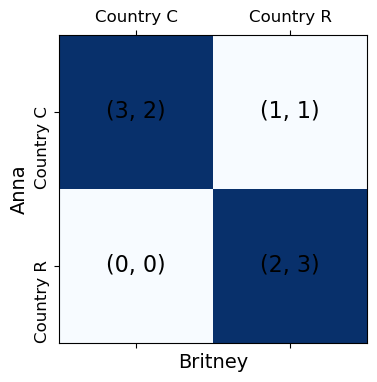

In [150]:
import matplotlib.pyplot as plt
import numpy as np

confusion_matrix = np.array([[6, 5], [5, 6]])

fig, ax = plt.subplots(figsize=(4, 4))
cax = ax.matshow(confusion_matrix, cmap='Blues')

rewards = [['(3, 2)', '(1, 1)'], 
     ['(0, 0)', '(2, 3)']]

for i in range(2):
    for j in range(2):
        ax.text(j, i, f'{rewards[i][j]}', ha='center', va='center', fontsize=16)

ax.set_xlabel('Britney', fontsize=14)
ax.set_ylabel('Anna', fontsize=14)
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(['Country C', 'Country R'], fontsize=12)
ax.set_yticklabels(['Country C', 'Country R'], fontsize=12, rotation=90)
plt.show()


## **Pareto Equilibrium**

##### **Formal Definition**:  
A **Pareto equilibrium**, or **Pareto optimal outcome**, is a state in a game where no player’s payoff can be increased without reducing the payoff of at least one other player. In other words, an outcome is Pareto optimal if it is impossible to make one player better off without making someone else worse off.

Mathematically, for a game with $ n $ players and a set of possible outcomes $ O $:  
An outcome $ o^* \in O $ is Pareto optimal if:  
$$
\nexists \, o \in O \quad \text{such that} \quad u_i(o) \geq u_i(o^*) \, \forall i \, \text{and} \, u_j(o) > u_j(o^*) \, \text{for some} \, j.
$$  
Here, $ u_i(o) $ represents the utility of player $ i $ for outcome $ o $.


In other words, Pareto equilibrium focuses on efficiency rather than fairness or stability: it doesn’t necessarily mean all players are happy with the outcome — only that no further improvements are possible without a trade-off that harms someone. Pareto optimality serves as a benchmark for evaluating the efficiency of outcomes in cooperative or competitive scenarios.

### **Pareto Equilibrium Example: Neural Network Trade-Offs**

In the design of neural networks, there is often a trade-off between two conflicting objectives:  
1. **Model Quality**: A larger neural network provides better prediction accuracy, improving customer satisfaction.  
2. **Service Speed**: A smaller neural network is faster to deliver, allowing you to serve more customers, even if the service quality is reduced.  

This creates a situation where optimizing one objective comes at the expense of the other. The **Pareto optimal frontier** represents the set of network configurations (sizes) where no improvement in one objective is possible without reducing the other.

The plot vizualisation:
1. Accuracy $A$ for the model in the range of $[0.0, 1.0]$ is what we can achieve with the current network size.
2. Fraction of our potential customers $C$ -- number of customers in the range of $[0.0, 1.0]$ that we can provide service to with the current neural network size.

Let's plot the dependency of this terms.

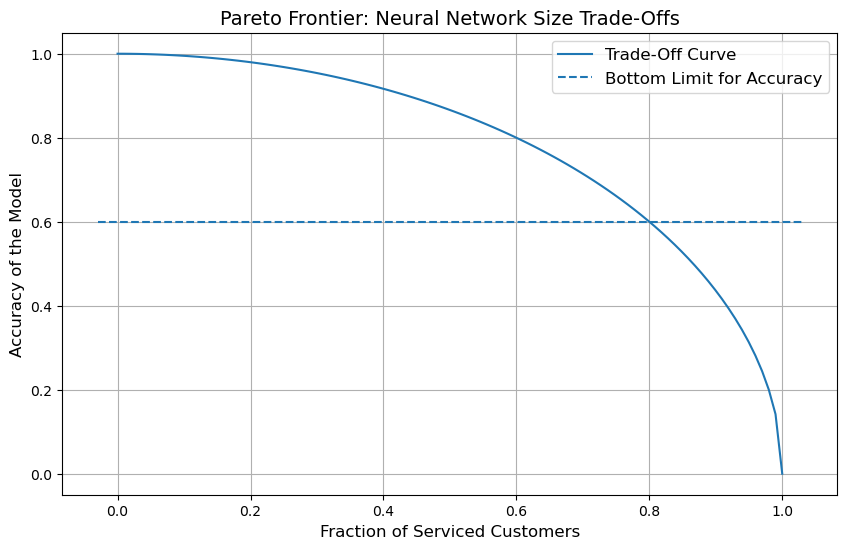

In [112]:
import numpy as np
import matplotlib.pyplot as plt

customers_fractions = np.linspace(0.0, 1.0 , 100)
quality = np.sqrt(1 - np.power(customers_fractions, 2))


plt.figure(figsize=(10, 6))
plt.plot(customers_fractions, quality, label="Trade-Off Curve")
plt.title("Pareto Frontier: Neural Network Size Trade-Offs", fontsize=14)
plt.hlines(0.6, -0.03, 1.03, linestyle='dashed', label='Bottom Limit for Accuracy')
plt.xlabel("Fraction of Serviced Customers", fontsize=12)
plt.ylabel("Accuracy of the Model", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


The challenge of this trade-off is further complicated by two critical constraints:  

1. **Minimum Acceptable Quality**: There exists a threshold level of accuracy below which the service becomes unattractive to users. This imposes a hard lower limit on the quality of the model that can be deployed.  

2. **Quality-Driven Pricing**: Even when the model quality exceeds this minimum threshold, the service's pricing increases only for models that offer significantly better quality. This creates an incentive to optimize the model quality carefully, balancing the added value against the increased cost to users.  

Understanding and navigating these constraints is essential for achieving an efficient balance between quality and service speed, aligning with both user expectations and business goals.

#### **Homework 2**
For the hometask, you can explore the relationship between model complexity and training time in the context of text classification. You will gradually increase the complexity of your models and observe the impact on both training time and model performance, ultimately plotting a **training time-quality curve** to analyze the trade-off.

1. Begin by implementing a simple linear model for text classification. Use an appropriate dataset and measure the training time for this baseline model.

2. Gradually increase the complexity of the model. You should try 4-5 different models, each with increasing complexity. For each model, measure the training time and record the results. Continue increasing the complexity until the training time reaches approximately x3 the original training time of the baseline model.

3. Plot the relationship between training time and model quality on a single plot. This will give you a **training time-quality curve** that shows the trade-off between model performance and training time.

4. Analyze the **optimization curve** formed by the trade-off between training time and model quality. Identify if there is any opportunity to improve the Pareto optimality of the curve. In other words, see if there are any regions where a model could be improved in quality without significantly increasing the training time, or vice versa. Basically, check how hard it is to go further than the plotted curve. 